<a href="https://colab.research.google.com/github/lawalAfeez820/Deep-learning/blob/main/model_evaluation_on_fibrosis_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADVANCED FIBROSIS DIAGNOSIS WITH NEURAL NETWORK

## Objective
Using a real dataset to predict whether a patient has advanced fibrosis based on measurements such as age,gender and BMI .

##Dataset
The dataset consists of information foe 1385 patients who underwent treatment dosages for hepatitis C.For each patient, 28 different attritutes are available as well as a class label,which can only take two values :1,indicating advanced fibrosis and 0 indicating no indication of advanced fibrosis.

## AIM
Implementing different deep neural network architechtures to perform the classification and determine how many epochs the final classifier need to be trained for before it started overfiting the data.

In [ ]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,ReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset

feature=pd.read_csv("/content/HCV_feats.csv")
target=pd.read_csv("/content/HCV_target.csv")

In [ ]:
# the number of rows and columns
feature.shape

(1385, 28)

In [ ]:
np.unique(target.values)

array([0, 1])

In [ ]:
#spliting the dataset into train and testdatset

x_train,x_test,y_train,y_test=train_test_split(feature,target,stratify=target,random_state=100)

In [ ]:
#performing standadization on the data
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
# Buiding a model with 1 hidden layer(3 nodes) using tanh as the activation function and sigmoid as  the  activation function for the output layer

model1=Sequential()
model1.add(Dense(input_dim=x_train.shape[1],units=3,activation="tanh"))
model1.add(Dense(units=1,activation="sigmoid"))

model1.compile(metrics=["accuracy"],optimizer="sgd",loss="binary_crossentropy")

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 87        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting the model on the train data with 100 epochs

history1=model1.fit(x_train,y_train,batch_size=20,epochs=100,validation_split=0.1,shuffle=False)

Epoch 1/100
47/47 [==============================] - 1s 6ms/step - loss: 0.7582 - accuracy: 0.5203 - val_loss: 0.7701 - val_accuracy: 0.5288
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7476 - accuracy: 0.5257 - val_loss: 0.7617 - val_accuracy: 0.5096
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.5289 - val_loss: 0.7545 - val_accuracy: 0.5096
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7312 - accuracy: 0.5321 - val_loss: 0.7484 - val_accuracy: 0.5288
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7249 - accuracy: 0.5375 - val_loss: 0.7432 - val_accuracy: 0.5385
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7195 - accuracy: 0.5375 - val_loss: 0.7387 - val_accuracy: 0.5192
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.5418 - val_loss: 0.7348 - val_accuracy: 0.5288
Epoch 8/100
4

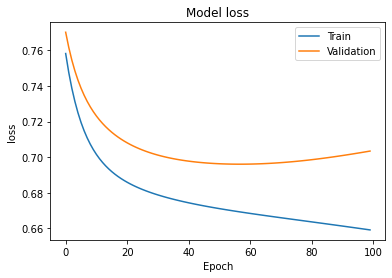

In [ ]:
#ploting the loss of the train and val data against epoch

plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Validation"])
plt.show()

In [ ]:
# printing out the best accuracy and validation set .Also print the loss and accuracy on test set

print(f"Best Accuracy on training set ={max(history1.history['accuracy']) *100:.3f}%")


print(f"Best Accuracy on validation set ={max(history1.history['val_accuracy']) *100 :.3f}%")

test_loss,test_acc=model1.evaluate(x_test,y_test)

print(f"The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%")






Best Accuracy on training set =60.385%
Best Accuracy on validation set =55.769%
11/11 [==============================] - 0s 2ms/step - loss: 0.7170 - accuracy: 0.4870
The loss on the test set is 0.7170 and the accuracy is 48.703%


In [ ]:
# Buiding a model with two hidden layer[4 and 2 nodes] using tanh as the activation function and using sigmoid as the  activation function of output layer

model2=Sequential()
model2.add(Dense(input_dim=x_train.shape[1],units=4,activation="tanh"))

model2.add(Dense(units=2,activation="tanh"))

model2.add(Dense(units=1,activation="sigmoid"))

model2.compile(metrics=["accuracy"],optimizer="sgd",loss="binary_crossentropy")

In [ ]:
# fitting the model on the train data with 100 epochs

history2=model2.fit(x_train,y_train,batch_size=20,epochs=100,validation_split=0.1,shuffle=False)

Epoch 1/100
47/47 [==============================] - 1s 8ms/step - loss: 0.9344 - accuracy: 0.4925 - val_loss: 0.9035 - val_accuracy: 0.4904
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.8815 - accuracy: 0.4957 - val_loss: 0.8571 - val_accuracy: 0.5096
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5032 - val_loss: 0.8214 - val_accuracy: 0.5000
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.8096 - accuracy: 0.5107 - val_loss: 0.7938 - val_accuracy: 0.5000
Epoch 5/100
47/47 [==============================] - 0s 8ms/step - loss: 0.7855 - accuracy: 0.5150 - val_loss: 0.7725 - val_accuracy: 0.5096
Epoch 6/100
47/47 [==============================] - 0s 9ms/step - loss: 0.7667 - accuracy: 0.5182 - val_loss: 0.7560 - val_accuracy: 0.5096
Epoch 7/100
47/47 [==============================] - 0s 6ms/step - loss: 0.7519 - accuracy: 0.5214 - val_loss: 0.7430 - val_accuracy: 0.5192
Epoch 8/100
4

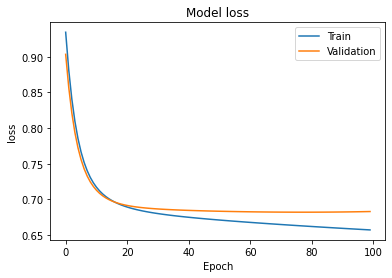

In [ ]:
#ploting the loss of the train and val data against epoch

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Validation"])
plt.show()

In [ ]:
# printing out the best accuracy and validation set .Also print the loss and accuracy on test set

print(f"Best Accuracy on training set ={max(history1.history['accuracy']) *100:.3f}%")


print(f"Best Accuracy on validation set ={max(history1.history['val_accuracy']) *100 :.3f}%")

test_loss,test_acc=model1.evaluate(x_test,y_test)

print(f"The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%")

Best Accuracy on training set =60.385%
Best Accuracy on validation set =55.769%
11/11 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.4870
The loss on the test set is 0.7170 and the accuracy is 48.703%


# CONCLUSION

Both the model were atleast good on the train and validation dataset but doing bad on the test data ,The is what is called overfitting and we can confirm that we don't need to add more layers to the model as it will keep doing bad on the unseen data